In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
path = os.path.join(os.getcwd(), 'data')
os.chdir(path)

Start by importing the data.

In [3]:
date_time = pd.read_csv('date_time.csv')
stations = pd.read_csv('stations.csv')

Take a quick look at the date_time table.

In [4]:
date_time.head()

,member_casual,started_at,month,n_month,day,n_day_week,n_day_month,start_time,ride_duration,rideable_type
0,member,2024-05-01 08:18:00 UTC,MAY,5,WEDNESDAY,4,1,8.18,6,electric_bike
1,casual,2024-05-01 18:56:04 UTC,MAY,5,WEDNESDAY,4,1,18.56,6,electric_bike
2,member,2024-05-27 11:37:24 UTC,MAY,5,MONDAY,2,27,11.37,5,electric_bike
3,casual,2024-05-19 19:02:00 UTC,MAY,5,SUNDAY,1,19,19.02,2,electric_bike
4,member,2024-05-25 12:59:28 UTC,MAY,5,SATURDAY,7,25,12.59,25,electric_bike


In [5]:
date_time.shape

(5703370, 10)

In [6]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703370 entries, 0 to 5703369
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   member_casual  object 
 1   started_at     object 
 2   month          object 
 3   n_month        int64  
 4   day            object 
 5   n_day_week     int64  
 6   n_day_month    int64  
 7   start_time     float64
 8   ride_duration  int64  
 9   rideable_type  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 435.1+ MB


Create a G class to store all the globable variables.

In [7]:
class G:
    m = 'member'
    c = 'casual'
    m_col = '#39b837'
    c_col = '#c42356'
    total_rides = date_time.shape[0]
    m_rides = date_time[date_time['member_casual'] == 'member'].shape[0] # Number of member rides
    c_rides = date_time[date_time['member_casual'] == 'casual'].shape[0] # Number of casual rides

In [28]:
print(f'Total rides: {G.total_rides}')
print(f'Member rides: {G.m_rides}')
print(f'Casual rides: {G.c_rides}')
print(f'Member rides percentage: {round(G.m_rides / G.total_rides * 100, 2)}%')
print(f'Casual rides percentage: {round(G.c_rides / G.total_rides * 100, 2)}%')

Total rides: 5703370
Member rides: 3673707
Casual rides: 2029663
Member rides percentage: 64.41%
Casual rides percentage: 35.59%


### Monthly engagement.

In [9]:
# Create a month table which contains the number of rides per month for each user type.
month = date_time.loc[:, ['member_casual', 'month', 'n_month']]
month = month.groupby(['member_casual', 'month', 'n_month']).size()
month = month.reset_index().sort_values(['n_month'])
month.head()

,member_casual,month,n_month,0
4,casual,JANUARY,1,24247
16,member,JANUARY,1,119924
3,casual,FEBRUARY,2,46750
15,member,FEBRUARY,2,175605
7,casual,MARCH,3,81813


**Note :** The graph below must not be confused with time series data, as the bars are not sorted by chronoligical order given that our data start from July.<br>
The point of this visualization is to highlight the riding patterns during different months.

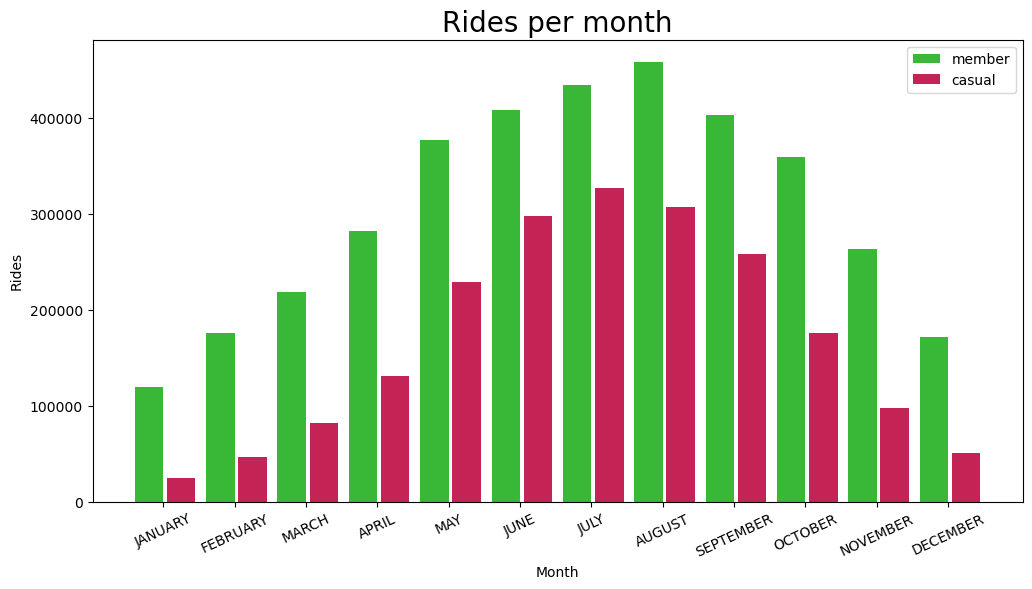

In [15]:
x = month['n_month'].unique()
labels = month['month'].unique()
member_count = month[0][month['member_casual'] == 'member']
casual_count = month[0][month['member_casual'] == 'casual']


plt.figure(figsize=(12, 6), dpi=100)
plt.bar(x -0.2, member_count, 0.4, label=G.m, color=G.m_col)
plt.bar(x + 0.25, casual_count, 0.4, label=G.c, color=G.c_col)
plt.xticks(x, labels, rotation=25)
plt.xlabel('Month')
plt.ylabel('Rides')
plt.legend()
plt.title('Rides per month', fontsize=20)
plt.show()

**Comment :** Members and casuals have similar distributions for months, meaning that weather and season have similar effects on both groups.

### Weekly engagement

In [11]:
# Create a week table which contains the number of rides per week for each user type.
week = date_time.loc[:, ['member_casual', 'day', 'n_day_week']]
week = week.groupby(['member_casual', 'day', 'n_day_week']).size()
week = week.reset_index().sort_values(['n_day_week'])

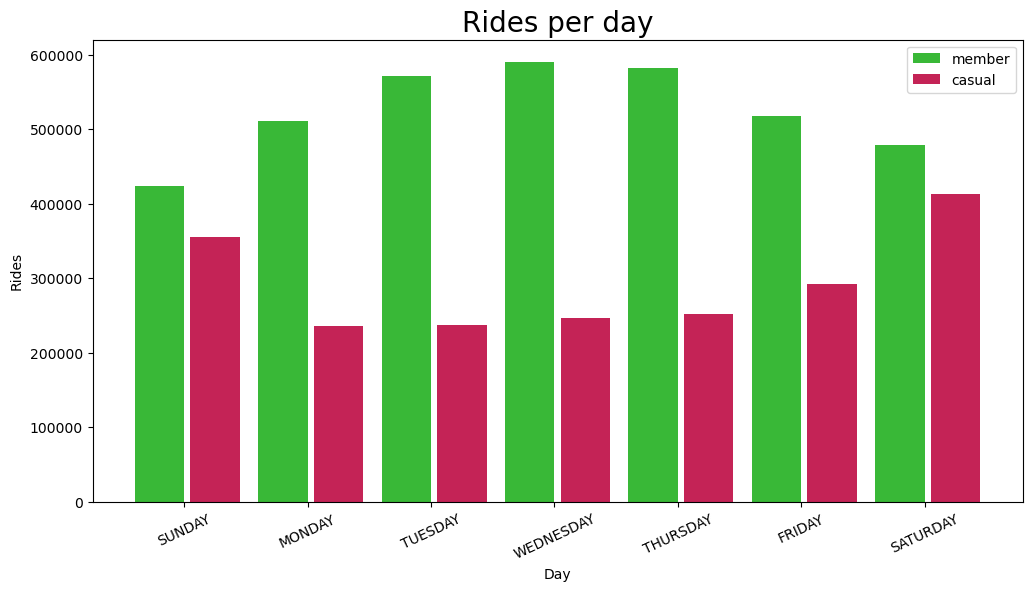

In [19]:
x = week['n_day_week'].unique()
labels = week['day'].unique()
member_count = week[0][week['member_casual'] == 'member']
casual_count = week[0][week['member_casual'] == 'casual']


plt.figure(figsize=(12, 6), dpi=100)
plt.bar(x -0.2, member_count, 0.4, label=G.m, color=G.m_col)
plt.bar(x + 0.25, casual_count, 0.4, label=G.c, color=G.c_col)
plt.xticks(x, labels, rotation=25)
plt.xlabel('Day')
plt.ylabel('Rides')
plt.legend()
plt.title('Rides per day', fontsize=20)
plt.show()

#### Weekends vs weekdays.

In [21]:
v = (date_time['day'] == 'SATURDAY') | (date_time['day'] == 'SUNDAY')
weekend = date_time[v]
weekday = date_time[-v]
weekend_m = weekend[weekend['member_casual'] == G.m]
weekday_m = weekday[weekday['member_casual'] == G.m]
weekend_c = weekend[weekend['member_casual'] == G.c]
weekday_c = weekday[weekday['member_casual'] == G.c]

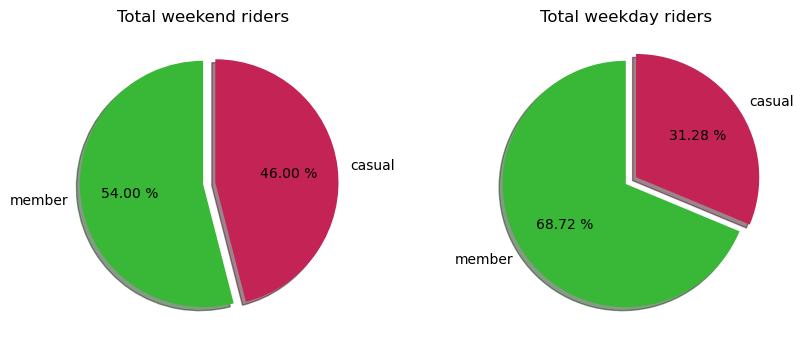

In [22]:
w = round(weekend.value_counts(weekend['member_casual'], normalize=True), 4) * 100
m = round(weekday.value_counts(weekday['member_casual'], normalize=True), 4) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

ax1.pie(w, 
        labels=w.index, 
        colors=[G.m_col, G.c_col],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True )

ax1.set_title('Total weekend riders')

ax2.pie(m, 
        labels=m.index, 
        colors=[G.m_col, G.c_col],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True)

ax2.set_title('Total weekday riders')

plt.show()

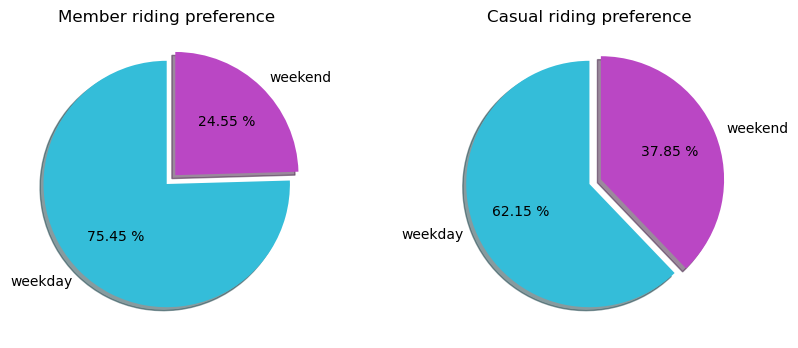

In [25]:
m_m = round(weekday_m.shape[0] / G.m_rides, 4) * 100 # members midweek
m_w = round(weekend_m.shape[0] / G.m_rides, 4) * 100 # members weekend etc
c_w = round(weekend_c.shape[0] / G.c_rides, 4) * 100
c_m = round(weekday_c.shape[0] / G.c_rides, 4) * 100

proportions = pd.DataFrame([[m_m, m_w],
                            [c_m, c_w] ], 
                            index=[G.m, G.c],
                            columns=['weekday', 'weekend'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100) 

ax1.pie(proportions.loc[G.m], 
        labels=['weekday', 'weekend'], 
        colors=['#34bdd9', '#ba47c4'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True
        )
ax1.set_title('Member riding preference')

ax2.pie(proportions.loc[G.c],
        labels=['weekday', 'weekend'],
        colors=['#34bdd9', '#ba47c4'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True)
ax2.set_title('Casual riding preference')

plt.show()


**Comment :** The weekly trends tell an interesting story. Here members seem to have a strong preferance to riding on weekdays. This is a sign that for many of them bike is a means of transportation for their every day activities. <br>
On the other hand, casual rides peak at the weekend signaling that for most of them bike is a means of leisure and tourist activities. But their overall preference chart suggests that besides all the tourists and one-time visitors in the city of Chicago, there might be an interesting pool of casuals from which we can draw potential new members.  

### Hourly engagement

In [29]:
# Create an hour table which contains the number of rides per hour in a day for each user type.
hour = date_time.loc[:, ['member_casual', 'start_time']]

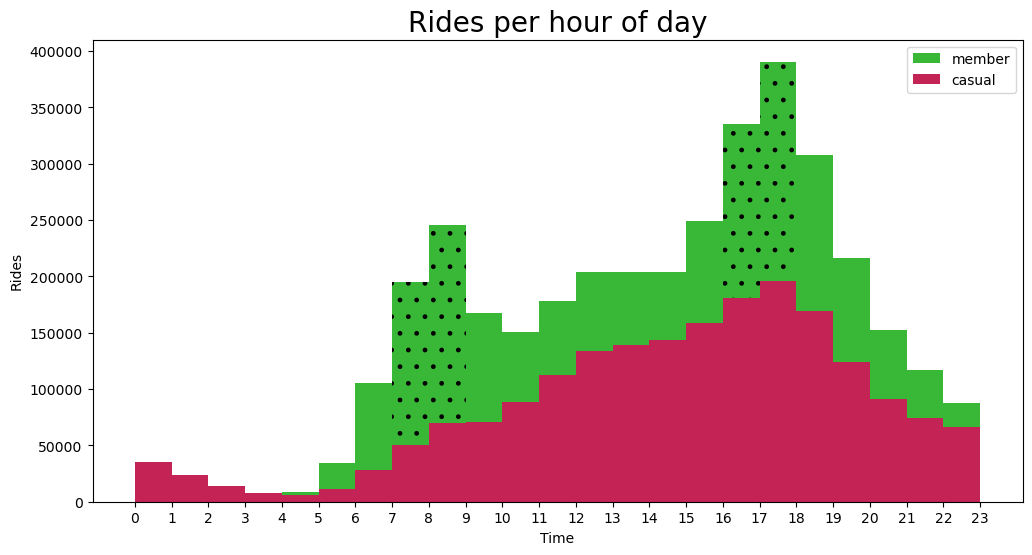

In [38]:
member = hour[hour['member_casual'] == G.m]
casual = hour[hour['member_casual'] == G.c]

plt.figure(figsize=(12, 6), dpi=100)

bins=np.arange(24)

# Create hist but also keep the bars variable in order to label the bars
counts, edges, bars = plt.hist(member['start_time'],bins=bins, color=G.m_col, label=G.m) # choose color from color picker(google search) bins=bins
plt.hist(casual['start_time'],bins=bins, color=G.c_col, label=G.c)

plt.xticks(ticks=bins)

bars[7].set_hatch('.')
bars[8].set_hatch('.')
bars[16].set_hatch('.')
bars[17].set_hatch('.')
#bars[4].set_hatch('**')
#bars[2].set_color('#6354b8')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Rides')
plt.title("Rides per hour of day", fontsize=20)

plt.show()

**Comment :** In this graph the doted hists show a local peak that is repeated exactly after 8 hours, suggesting clearly that many members ride their way to work/school/university etc.<br>
Members on the other side, peak smoothly in the afternoon hours.

### Riding duartions

In [39]:
# Create a table that contains only membership status and rie duration.
duration = date_time.loc[:, ['member_casual', 'ride_duration']]

**Note :** For this section it might be reasonable to omit the entries with ride duration smaller than a minute and over 12 hours.<br>
This decision has to do with the fact that most of these entries have likely occured due to some problematic reason (eg. system malfunction, user mistake etc.) and they do not add value to behavioural insights.

In [41]:
duration = date_time.loc[:, ['member_casual', 'ride_duration']]
duration = duration[(duration['ride_duration'] >= 1.0) & (duration['ride_duration'] <= 720.0)]
m_d = duration[duration['member_casual'] == 'member']
c_d = duration[duration['member_casual'] == 'casual']

In [47]:
print(f"Average Member ride duration : {round(m_d['ride_duration'].mean(), 2)} min")
print(f"Average Casual ride duration : {round(c_d['ride_duration'].mean(), 2)} min")

Average Member ride duration : 12.17 min
Average Casual ride duration : 20.18 min


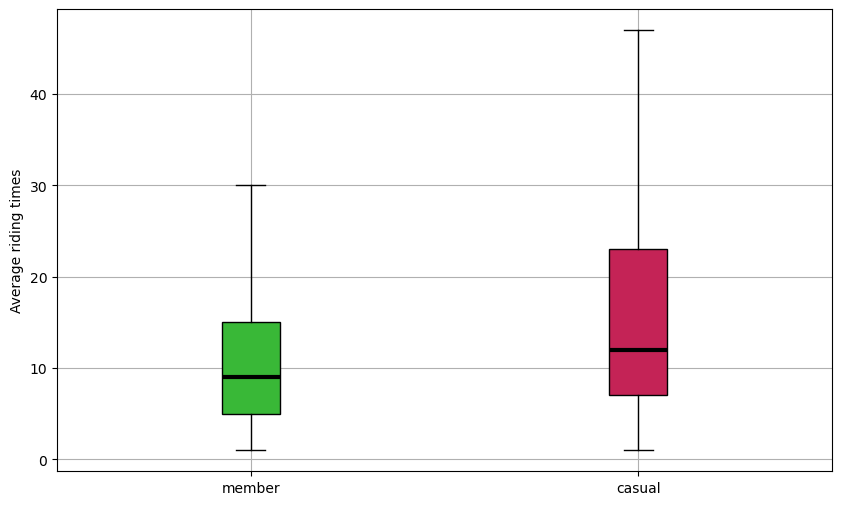

In [48]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.set_ylabel('Average riding times')
arrays = [np.array(m_d['ride_duration']), np.array(c_d['ride_duration'])]
bplot = ax.boxplot(arrays,
                   showfliers=False,
                   patch_artist=True)  # will be used to label x-ticks
colors = [G.m_col, G.c_col]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set(color ='black',
               linewidth = 3)
ax.set_xticklabels([G.m, G.c])
plt.grid()
plt.show()

**Comment :** Here the data tell a clear story. Casuals tend to take longer rides than members, making the utility versus leisure riding arguement even stronger.

### Bike type preference

In [49]:
# Create a table that contains only membership status and bike type.
rideable = date_time.loc[:, ['member_casual', 'rideable_type']]

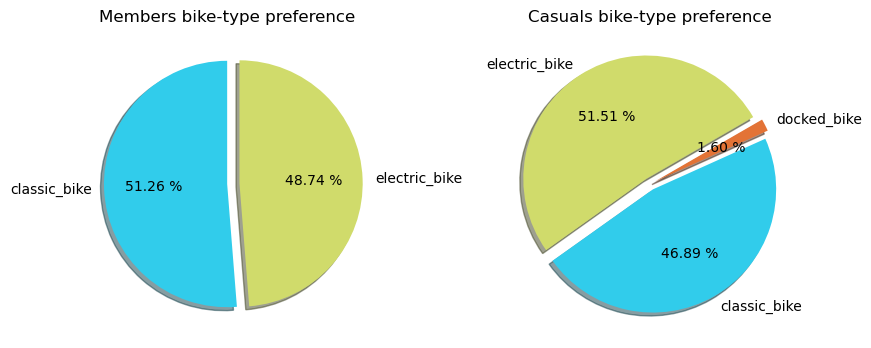

In [51]:
r_m = round(rideable[rideable['member_casual'] == G.m].value_counts(normalize=True), 4) * 100
r_c = round(rideable[rideable['member_casual'] == G.c].value_counts(normalize=True), 4) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
# Plot data on the first subplot
ax1.pie(r_m, 
        labels=r_m.reset_index()['rideable_type'], 
        colors=['#31cceb', '#d0db6b'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True )
ax1.set_title('Members bike-type preference')

# Plot data on the second subplot
ax2.pie(r_c, 
        labels=r_c.reset_index()['rideable_type'], 
        colors=['#d0db6b', '#31cceb', '#e37336'],
        autopct='%.2f %%',
        explode=[0.051, 0.05, 0.05],
        startangle=30,
        shadow=True
        )
ax2.set_title('Casuals bike-type preference')

plt.show()

**Comment :** The graphs suggest that there is no notable difference between the bike-type preference of the two groups.

### Random forests for most important features

### Feature importance

It is a good idea to use some machine learning to check some of our insights or even gain some new ones.<br><br>
In this case we can benefit from a simple Random Forest classifier that has the ability to assign an importance score to each feature 
in the training set.<br><br>
We begin by defining a new dataset that consists only of the numerical represantations for months.<br> The days column is replaced by a column that indicates where the ride took place on the weekend or not. This also help reduces helps the model to not perceive days as a categorical feature.<br> The rideable_type feature will aslo be excluded because, as we saw earlier, casuals and members have almost identical distributions. So keeping it would only add unnecessary complexity to the model.<br> 
Lastly, we exclude some extreme values and outliers from ride_duration to reduce their impact on the learning process.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

forest_data = date_time.loc[:, ['member_casual', 'n_month',  'start_time',  'ride_duration']]
forest_data = forest_data[(forest_data['ride_duration'] > 0.3) & (forest_data['ride_duration'] < 720.0)]
forest_data['weekday'] = -v # weekend true or false vector

X_train, X_test, y_train, y_test = train_test_split(forest_data.drop('member_casual', axis=1),
                                forest_data['member_casual'],
                                test_size=5000, 
                                train_size=80000, 
                                random_state=6, 
                                shuffle=True,
                                stratify=forest_data['member_casual'])

le = LabelEncoder()
y_train, y_test = le.fit_transform(y_train), le.fit_transform(y_test) # Encode the member_casual feature

First lets bulid a dummy classifier that blindly guesses the most frequent class, in order to get a baseline result.

In [87]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf = dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.6446

Now let's train several classifiers using Grid Search, and use cross validation to get the best hyperparameter combination.

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[600, 800],
        'max_features':[2, 3, 4],
        'min_samples_leaf':[10, 15],
        'min_samples_split':[50, 100]}

rfc = GridSearchCV(RandomForestClassifier(),
                param_grid=params, 
                cv=3)

rfc = rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.6738

In [78]:
print(rfc.best_estimator_)

RandomForestClassifier(max_features=3, min_samples_leaf=15,
                       min_samples_split=100, n_estimators=600)


In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(n_estimators=700, max_features=3, min_samples_leaf=20, min_samples_split=120)

rfc_1 = rfc_1.fit(X_train, y_train)
rfc_1.score(X_test, y_test)

0.6744

The models' performance is mediocre, and it seems that it could benefit by scaling both the training set size and its' hyperparameters.<br>
But, let's look at which are the most important features that our model has 'learned'.

In [89]:
for score, feature in zip(rfc_1.feature_importances_, rfc_1.feature_names_in_):
    print(f'Importance of {feature} : {round(score, 3)}')

Importance of n_month : 0.135
Importance of start_time : 0.355
Importance of ride_duration : 0.409
Importance of weekday : 0.102


The model seems to recognize ride_duration and start_time as, by far, the most important features for choosing between a member and a casual. On the other side, days of the week do not seem to be of particular importance. Although these findings somehow confirm some of the trends we saw earlier in the graphs, there is a lot of room for improvement fot the model to be considered reliable.

### Stations

Let's take a look at the most popular groups for each group.

In [ ]:
stations.sort_values('casual_rides', ascending=False).head(5)

,station,lat,long,num_of_start_rides,member_rides,casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
372,Streeter Dr & Grand Ave,41.89,-87.61,63714,16457,47257,15484,46163,2067
532,DuSable Lake Shore Dr & Monroe St,41.88,-87.62,42513,10462,32051,10443,30639,1431
262,Michigan Ave & Oak St,41.90,-87.62,37931,14616,23315,11520,25585,826
133,DuSable Lake Shore Dr & North Blvd,41.91,-87.63,37343,15940,21403,9928,26682,733
530,Millennium Park,41.88,-87.62,30220,10199,20021,8907,20431,882


In [ ]:
stations.sort_values('member_rides', ascending=False).head(5)

,station,lat,long,num_of_start_rides,member_rides,casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
531,Clinton St & Washington Blvd,41.88,-87.64,33965,27791,6174,15565,18327,73
371,Kingsbury St & Kinzie St,41.89,-87.64,35450,26731,8719,13301,22067,82
261,Clark St & Elm St,41.90,-87.63,35244,24660,10584,12487,22616,141
529,Clinton St & Madison St,41.88,-87.64,28968,22665,6303,12773,16124,71
132,Wells St & Concord Ln,41.91,-87.64,31799,20659,11140,13166,18527,106


Here we can benefit from a spatial visualization to get a grasp of the stations that each group uses to start their rides from. This [interactive map](https://public.tableau.com/app/profile/fotios.ntinas/viz/MembersvsCasuals/Sheet1?publish=yes) made using Tableau, can help up draw some insights.

**Comment :** Bigger circles indicate popular casuals' stations, whereas popular members' stations are denoted with dark green color.<br>
Big, pale green circles and small, dark green circles are the cases that most signify the differences between casuals and members. For example, big pale circles can be found near popular tourist destinations.

Places that might of particular interest, are denoted with circles that are both dark green and big. They might be good places to look for users willing to convert from casuals to members.<br>
For this reason it's a good idea to search for stations that their members to casuals ratio is approximately between 1 and their original ratio from the whole dataset.

In [92]:
original_ratio = G.m_rides / G.c_rides
stations_to_keep = stations.loc[(stations['member_rides'] / stations['casual_rides'] > 0.8) & 
             (stations['member_rides'] / stations['casual_rides'] < original_ratio) & 
             (stations['num_of_start_rides'] > 5000)].sort_values(['num_of_start_rides'], ascending=False)
stations_to_keep.head(4)

,station,lat,long,num_of_start_rides,member_rides,casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
962,Theater on the Lake,41.93,-87.63,29956,13538,16418,7250,22261,445
655,Indiana Ave & Roosevelt Rd,41.87,-87.62,26630,14560,12070,7821,18444,365
851,Wilton Ave & Belmont Ave,41.94,-87.65,26239,16592,9647,10259,15874,106
370,Wabash Ave & Grand Ave,41.89,-87.63,25259,15408,9851,9097,15932,230


<hr>